<a href="https://colab.research.google.com/github/Guivaluarte/MNIST_Handwritten_CNN/blob/main/MNIST_Handwriten_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import os

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
 #Load dataset
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Scaling pixel values betwen 0 and 1
x_train = x_train/255
x_test = x_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

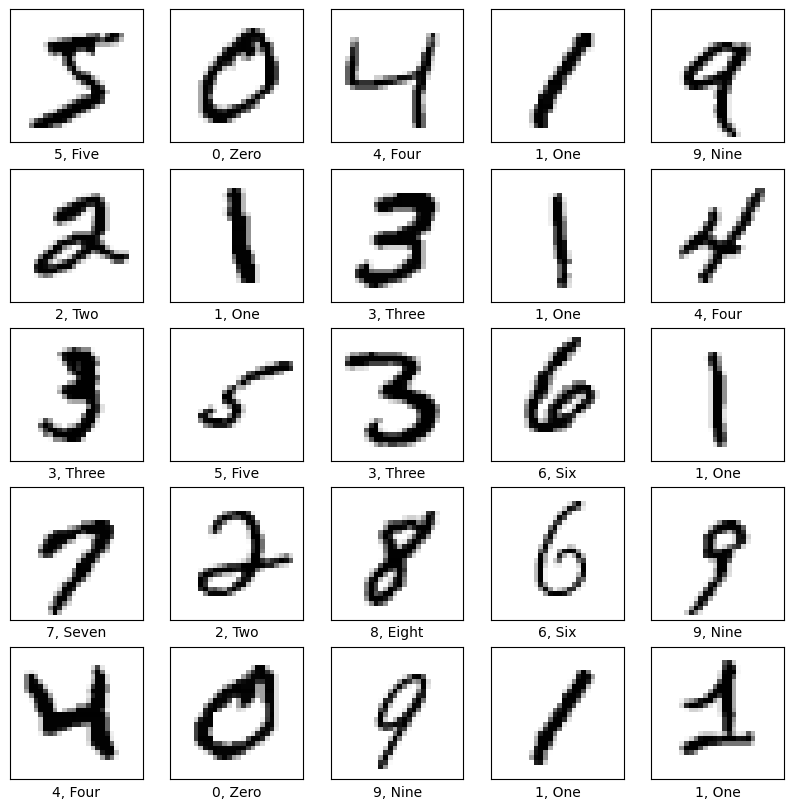

In [4]:
# display the first 25 images from traing set in a grid

plt.figure(figsize=(10, 10))


for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap= plt.cm.binary)
  plt.xlabel(f'{y_train[i]}, {class_names[y_train[i]]}')

plt.show()

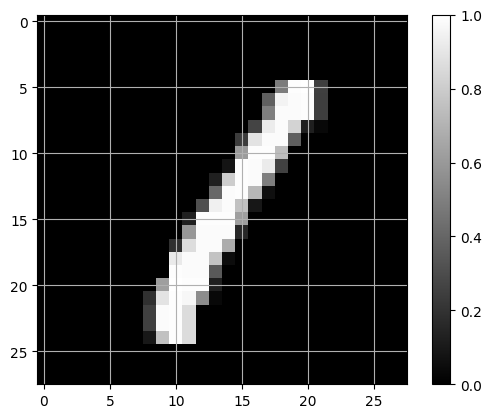

Class id: 1, Class name One


In [5]:
#Display a single image

index= 3

plt.imshow(x_train[index], cmap='gray')
plt.colorbar()
plt.grid(True)
plt.show()

print(f'Class id: {y_train[index]}, Class name {class_names[y_train[index]]}')

In [6]:
# one hot encoding labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [36]:
#Building the CNN model
def cnn_model():
  model = tf.keras.Sequential([
      layers.Conv2D(6,(3,3),input_shape=(28,28,1),activation='relu'),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Flatten(input_shape=(28,28)),

      layers.Dense(128, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(80, activation='relu'),

      layers.Dense(10, activation= 'softmax')])

  #Compiling model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = cnn_model()

In [10]:
#Training the model
x_train2 = x_train.reshape(60000,28,28,1)
x_test2 = x_test.reshape(10000,28,28,1)

model.fit(x_train2, y_train,
          epochs = 20,
          batch_size= 1000,
          verbose= True,
          validation_data=(x_test2, y_test))

Epoch 1/20
60/60 [==============================] - 14s 203ms/step - loss: 0.9404 - accuracy: 0.7617 - val_loss: 0.2869 - val_accuracy: 0.9133
Epoch 2/20
60/60 [==============================] - 11s 186ms/step - loss: 0.2438 - accuracy: 0.9270 - val_loss: 0.1904 - val_accuracy: 0.9444
Epoch 3/20
60/60 [==============================] - 12s 196ms/step - loss: 0.1712 - accuracy: 0.9493 - val_loss: 0.1392 - val_accuracy: 0.9573
Epoch 4/20
60/60 [==============================] - 11s 189ms/step - loss: 0.1294 - accuracy: 0.9614 - val_loss: 0.1135 - val_accuracy: 0.9671
Epoch 5/20
60/60 [==============================] - 10s 173ms/step - loss: 0.1065 - accuracy: 0.9681 - val_loss: 0.1016 - val_accuracy: 0.9694
Epoch 6/20
60/60 [==============================] - 11s 186ms/step - loss: 0.0891 - accuracy: 0.9734 - val_loss: 0.0847 - val_accuracy: 0.9749
Epoch 7/20
60/60 [==============================] - 12s 199ms/step - loss: 0.0786 - accuracy: 0.9765 - val_loss: 0.0802 - val_accuracy: 0.9747

In [11]:
test_loss, test_acc = model.evaluate(x_test2, y_test)
print("accuracy:", test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0593 - accuracy: 0.9824
accuracy: 0.9824000000953674


In [14]:
predictions=model.predict(x_test2)

313/313 [==============================] - 2s 4ms/step


In [29]:
def plt_image(i, predictions_arr, true_label, img):
  predictions_arr, true_label,img= predictions_arr[i], true_label[i], img[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_arr)
  true_label=np.argmax(true_label)

  if predicted_label == true_label:
    color= 'blue'

  else:
    color= 'red'

 # plt.xlabel(f'{class_names[predicted_label]} { 100*np.max(predictions_arr):2.0f} {class_names[true_label]} {color=color}')
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_arr),
                                       class_names[true_label]),
             color=color)

def plt_value_arr(i, predictions_arr, true_label):
  predictions_arr, true_label = predictions_arr[i], true_label[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  thisplot=plt.bar(range(10), predictions_arr, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_arr)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')





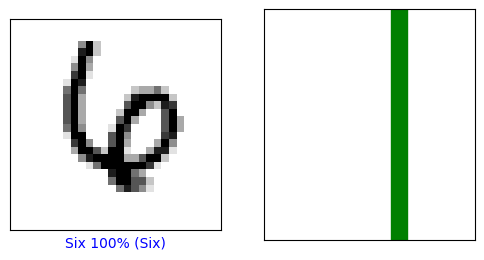

In [30]:
i = 22

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plt_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plt_value_arr(i, predictions, y_test)
plt.show()


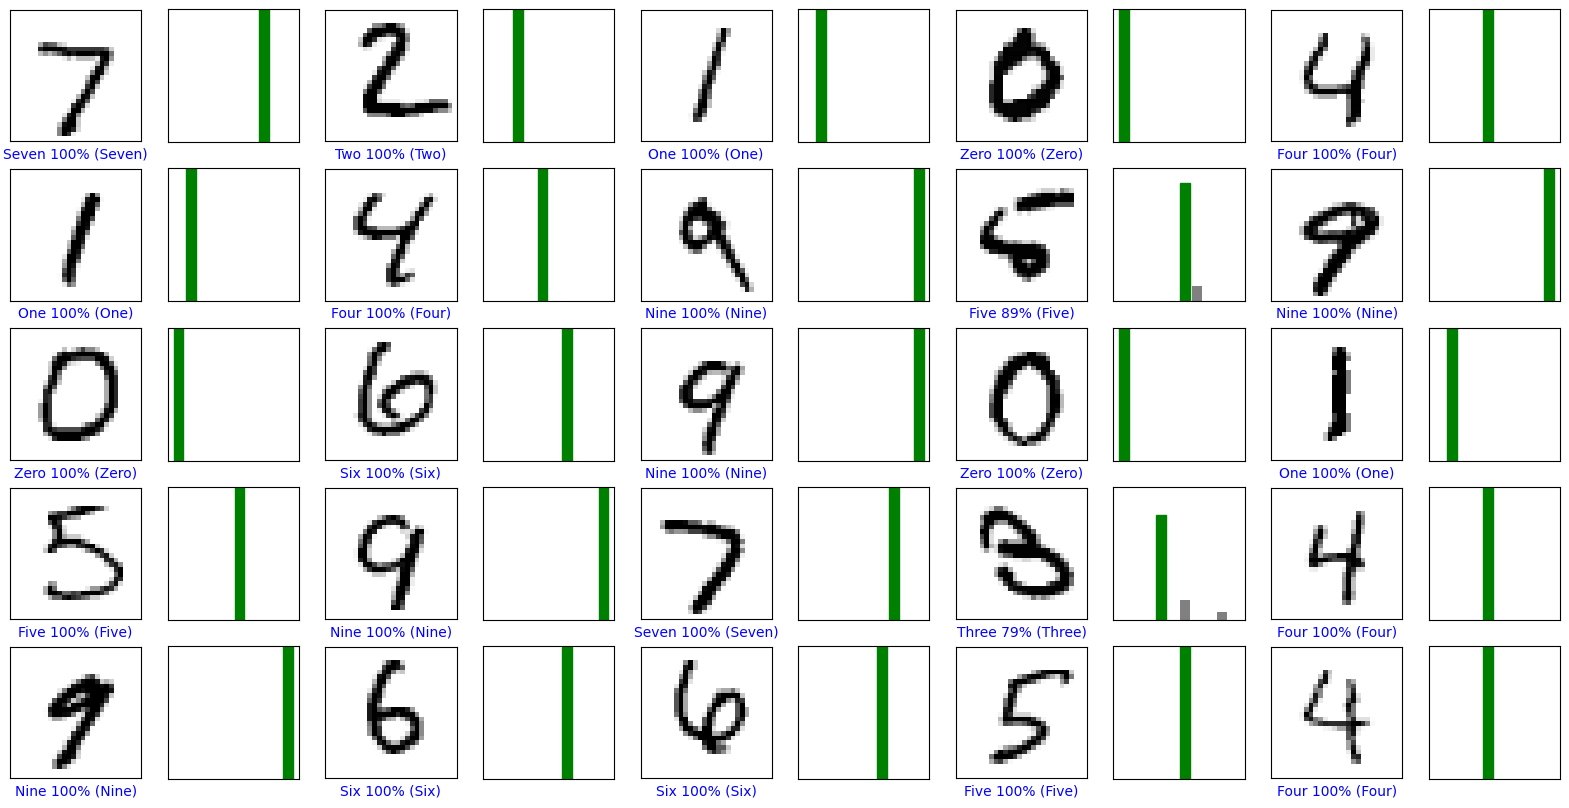

In [32]:
num_rows = 5
num_collums = 5
num_images = num_rows*num_collums

plt.figure(figsize=(2*2*num_collums,2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_collums, 2*i+1)
  plt_image(i,predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_collums, 2*i+2)
  plt_value_arr(i, predictions, y_test)
plt.show()

In [38]:
#Saving the model

model.save('MNIST_Handwriten_CNN')